In [ ]:
%load_ext autoreload

%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sweep import Sweep
from ap_trains import Trains
import os
import seaborn as sns
from scipy import stats

import scikit_posthocs as sp
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
trains = Trains('14 dpi/Trains/2022-03-29_001_18.asc')

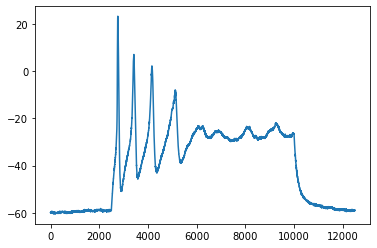

In [ ]:
plt.plot(trains.voltage[2])

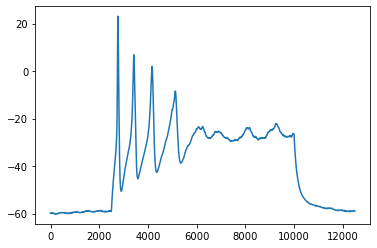

In [ ]:
plt.plot(trains.voltage_filtered[2])

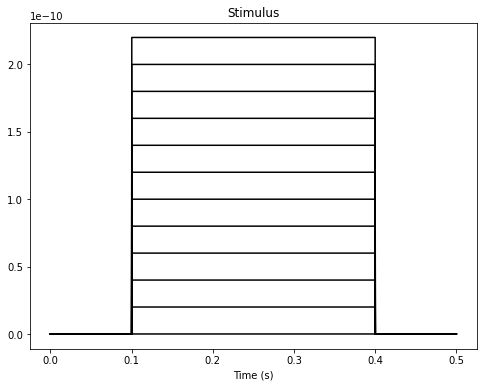

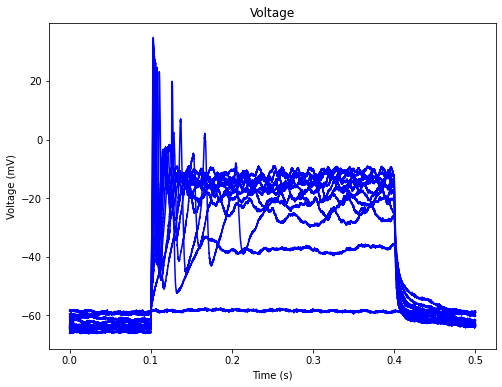

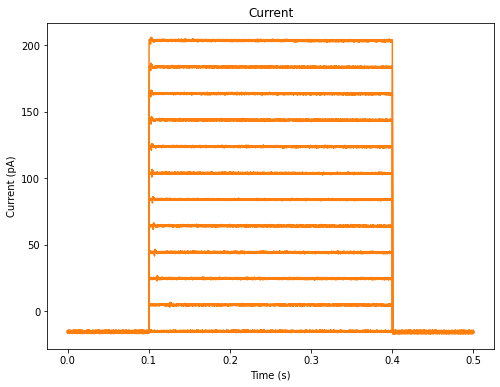

In [ ]:
trains.plot()

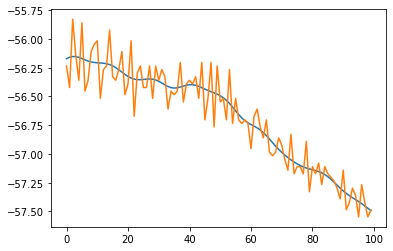

In [ ]:
plt.plot(trains.voltage_filtered[10][200:300])
plt.plot(trains.voltage[10][200:300])

In [ ]:
def get_ap_properties(data, properties = ['firing_threshold', 'amplitude_max', 'amplitude_min', 'spike_width_0mV', 'spike_width']):
    values = [] 
    properties_all = []
    for properti in properties:
        attribute = getattr(data, properti)
        properties_all.append(properti)
        if data.true_ap[-1] == True:
            where_first_ap = (np.argwhere(np.isnan(data.firing_threshold)).max()+1)
            values.append(np.float64(attribute[where_first_ap]))
            plot = True
        else:
            values.append(np.nan)
            plot = False
    
    max_frequency = np.max(data.ap_frequency)
    max_aps = np.max(data.ap_number)
        
    properties_all.append("rheobase")
    properties_all.append("max_frequency")
    properties_all.append("max_ap_number")
    
    values.append(np.float64(data.rheobase))
    values.append(np.float64(data.max_frequency))
    values.append(np.float64(data.max_aps))
    print(values)
    
    
    
    if plot:
        if max_frequency > 1:
            max_index = np.argmax(data.ap_number)
            peaks, peak_properties = signal.find_peaks(data.voltage_filtered[max_index], height=0, distance = 500)
            plt.plot(data.voltage_filtered[max_index])
            plt.scatter(peaks, peak_properties['peak_heights'], c='r')
            plt.show()
            
        else:
            plt.plot(data.voltage_filtered[where_first_ap])
            plt.scatter(data.amplitude_argmax[where_first_ap], data.amplitude_max[where_first_ap], c='r')
            plt.show()
        
    else:
        plt.plot(data.voltage_filtered[-1])
        plt.show()
        
    
    return dict(zip(properties_all, values))

[-29.49338034, 35.2169089, -63.396692279999996, 3.2399999999999998, 4.88, 40.0, 22.844958879074017, 7.0]


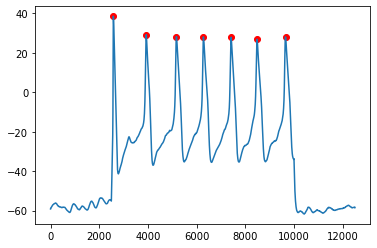

{'firing_threshold': -29.49338034,
 'amplitude_max': 35.2169089,
 'amplitude_min': -63.396692279999996,
 'spike_width_0mV': 3.2399999999999998,
 'spike_width': 4.88,
 'rheobase': 40.0,
 'max_frequency': 22.844958879074017,
 'max_ap_number': 7.0}

In [ ]:
get_ap_properties(trains)

In [ ]:
dpi14_path = '14 dpi/Trains/'
dpi15_path = '15 dpi/Trains/'
dpi16_path = '16 dpi/Trains/'
dpi17_path = '17 dpi/Trains/'
drg_path = 'DRG/Trains'

In [ ]:
def get_ap_properties_all(path):
    ap_properies_all = []
    for filename in os.listdir(path):
        filepath = os.path.join(path, filename)
        print(filepath)
        data_trains = Trains(filepath)
        ap_properies = get_ap_properties(data_trains)
        ap_properies_all.append(ap_properies)
    return ap_properies_all

14 dpi/Trains/2022-03-29_001_01.asc
[-38.90749067, 16.85782708, -61.42629683, 1.48, 2.56, 40.0, 0.0, 1.0]


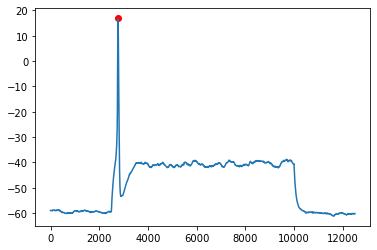

14 dpi/Trains/2022-03-29_001_02.asc
[-35.248186440000005, 4.128447734, -59.54973027, 1.36, 3.8, 40.0, 0.0, 1.0]


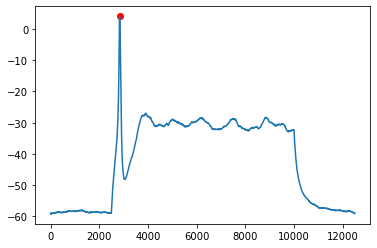

14 dpi/Trains/2022-03-29_001_03.asc
[-36.53050587, 15.66933468, -61.238639060000004, 1.72, 3.0, 40.0, 0.0, 1.0]


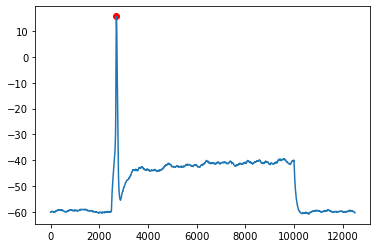

14 dpi/Trains/2022-03-29_001_04.asc
[-38.4696275, 15.70061222, -60.8320497, 2.12, 3.64, 40.0, 0.0, 1.0]


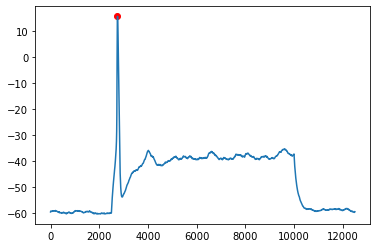

14 dpi/Trains/2022-03-29_001_05.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


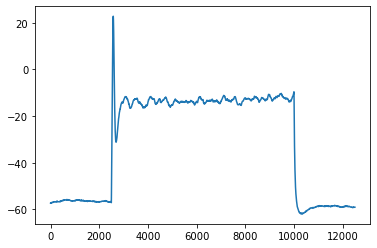

14 dpi/Trains/2022-03-29_001_06.asc
[-35.74860469, 24.708133189999998, -59.956319629999996, 2.0799999999999996, 3.16, 40.0, 43.936731107205645, 2.0]


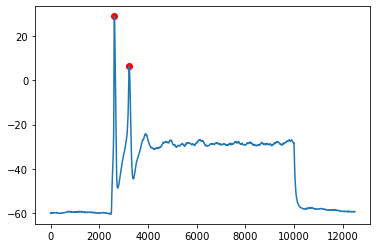

14 dpi/Trains/2022-03-29_001_07.asc
[-37.2498557, 10.32111887, -60.55056676, 1.56, 3.44, 60.0, 0.0, 1.0]


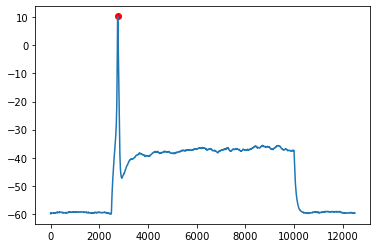

14 dpi/Trains/2022-03-29_001_08.asc
[-36.81199253, 10.94664168, -60.706947, 1.84, 3.8400000000000003, 40.0, 0.0, 1.0]


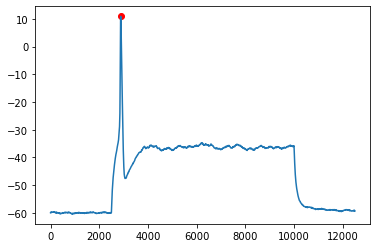

14 dpi/Trains/2022-03-29_001_09.asc
[-33.99714082, 17.29569398, -60.64439192, 1.9200000000000002, 3.44, 40.0, 0.0, 1.0]


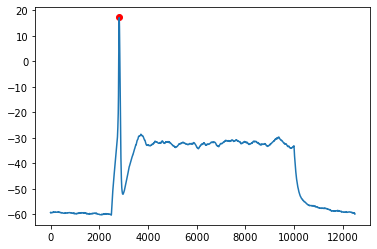

14 dpi/Trains/2022-03-29_001_10.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


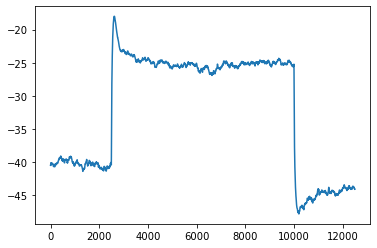

14 dpi/Trains/2022-03-29_001_12.asc
[-36.53050587, 15.01253713, -65.99260867, 1.8, 3.0799999999999996, 40.0, 0.0, 1.0]


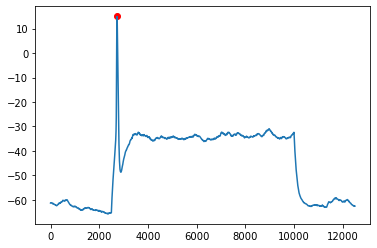

14 dpi/Trains/2022-03-29_001_14.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


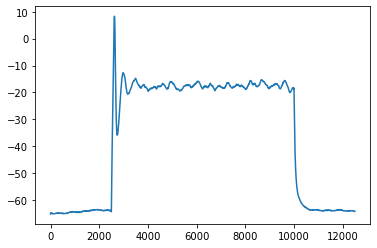

14 dpi/Trains/2022-03-29_001_15.asc
[-37.53134236, 4.284828436, -61.08225882, 1.76, 4.84, 40.0, 0.0, 1.0]


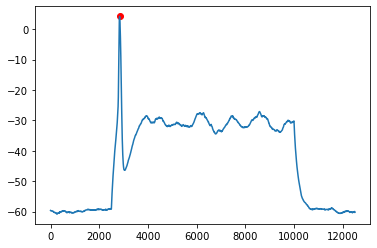

14 dpi/Trains/2022-03-29_001_16.asc
[-39.9396047, 9.601768106, -60.64439192, 1.72, 3.6, 60.0, 0.0, 1.0]


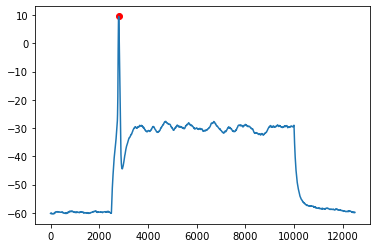

14 dpi/Trains/2022-03-29_001_18.asc
[-34.56011042, 19.86033469, -60.48801169, 1.8, 3.16, 20.0, 48.54368932038837, 3.0]


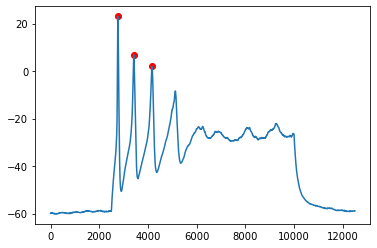

14 dpi/Trains/2022-03-29_001_19.asc
[-34.34117883, 16.73272252, -60.519289230000005, 1.9200000000000002, 3.4, 40.0, 0.0, 1.0]


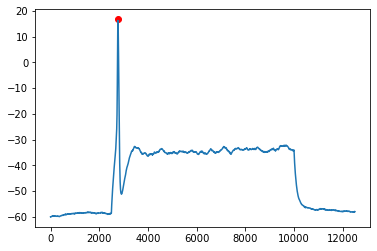

14 dpi/Trains/2022-03-29_001_20.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


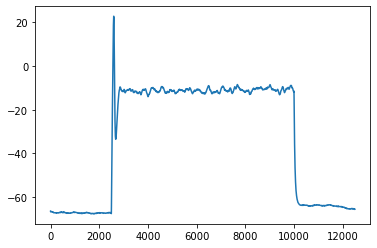

15 dpi/Trains/2022-03-30_001_04.asc
[-34.21607241, 15.23146965, -59.20569226, 1.96, 3.6, 20.0, 0.0, 1.0]


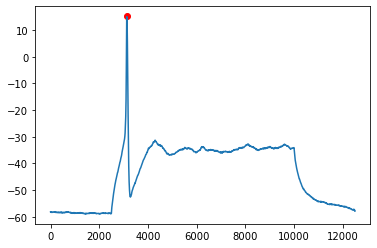

15 dpi/Trains/2022-03-30_001_05.asc
[-31.18229099, 0.34403731120000003, -59.39335003, 0.27999999999999997, 3.8, 60.0, 0.0, 1.0]


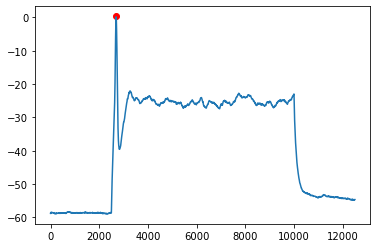

15 dpi/Trains/2022-03-30_001_07.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


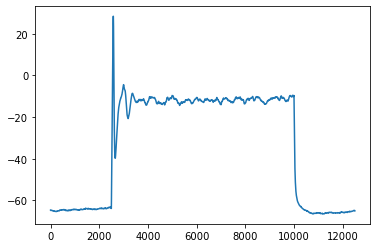

15 dpi/Trains/2022-03-30_001_09.asc
[-36.40540317, 8.288171142000001, -63.396692279999996, 1.0399999999999998, 2.4, 20.0, 0.0, 1.0]


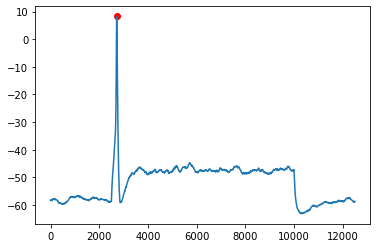

15 dpi/Trains/2022-03-30_001_11.asc
[-35.59222445, 9.414111264, -59.92504209, 1.72, 3.52, 40.0, 0.0, 1.0]


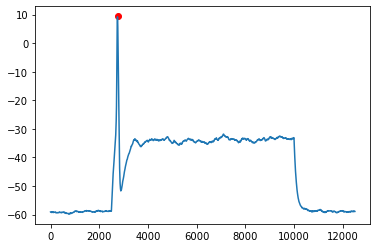

15 dpi/Trains/2022-03-30_001_12.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


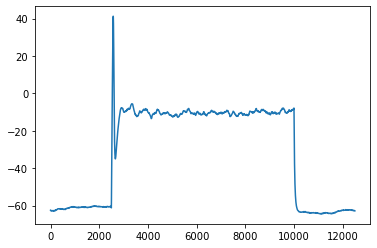

15 dpi/Trains/2022-03-30_001_13.asc
[-35.904984920000004, 16.13847725, -59.330794960000006, 54.080000000000005, 58.12, 20.0, 43.63001745200699, 3.0]


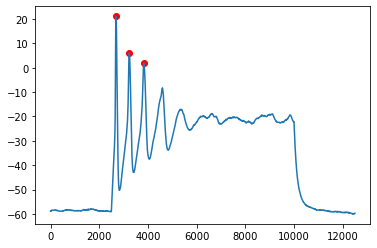

15 dpi/Trains/2022-03-30_001_14.asc
[-37.468791010000004, 25.99045448, -58.98676068, 1.56, 2.4, 20.0, 0.0, 1.0]


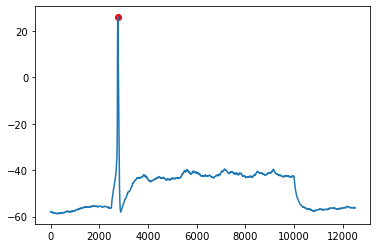

15 dpi/Trains/2022-03-30_001_15.asc
[-38.12558949, 7.693924941, -61.11353636, 1.1199999999999999, 2.52, 40.0, 0.0, 1.0]


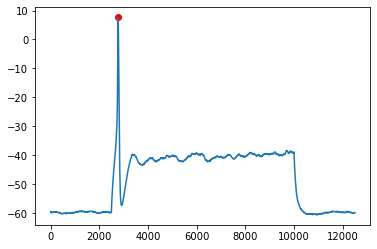

15 dpi/Trains/2022-03-30_001_16.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


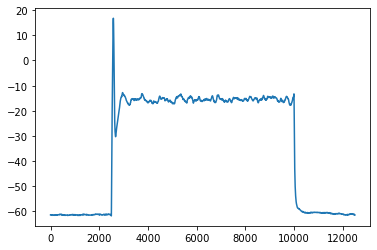

15 dpi/Trains/2022-03-30_001_17.asc
[-36.561783399999996, 16.357410700000003, -62.833718960000006, 1.4400000000000002, 25.8, 40.0, 0.0, 1.0]


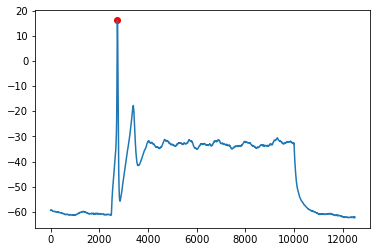

15 dpi/Trains/2022-03-30_001_18.asc
[-43.25487092, 5.1292832939999995, -59.51845273, 0.88, 2.32, 40.0, 0.0, 1.0]


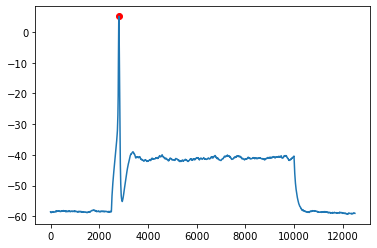

15 dpi/Trains/2022-03-30_001_20.asc
[-37.15603054, 5.1292832939999995, -59.73738804, 1.36, 4.04, 60.0, 0.0, 1.0]


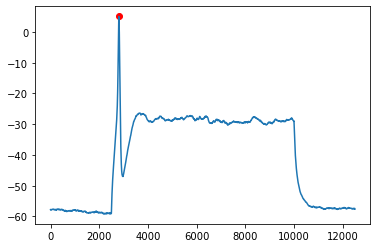

15 dpi/Trains/2022-03-30_001_21.asc
[-37.31241077, 13.88659701, -60.48801169, 1.24, 2.4, 40.0, 0.0, 1.0]


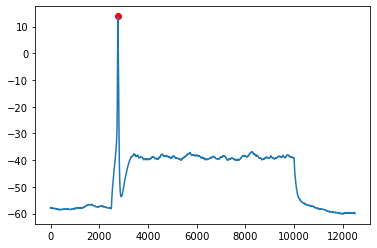

15 dpi/Trains/2022-03-30_001_23.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


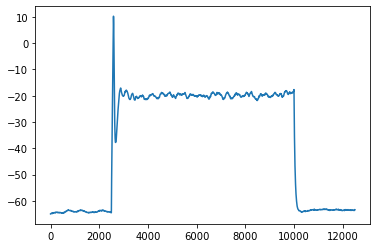

15 dpi/Trains/2022-03-30_001_24.asc
[-34.56011042, 7.005850319, -61.89543754, 1.0399999999999998, 2.4, 60.0, 0.0, 1.0]


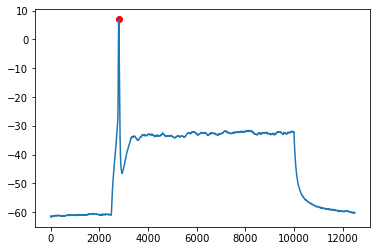

16 dpi/Trains/2022-04-06_001_02.asc
[-33.49672258, 4.128447734, -60.2690801, 0.7200000000000001, 2.32, 40.0, 0.0, 1.0]


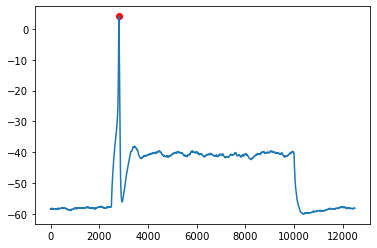

16 dpi/Trains/2022-04-06_001_03.asc
[-39.03259709, 18.07759702, -60.86332723, 1.6, 2.8, 40.0, 0.0, 1.0]


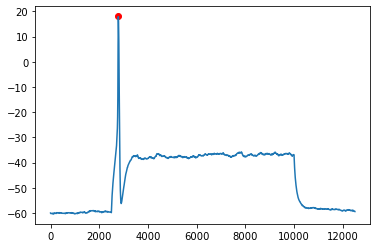

16 dpi/Trains/2022-04-06_001_04.asc
[-36.09263897, 2.846126677, -59.58100408, 1.32, 5.24, 60.0, 0.0, 1.0]


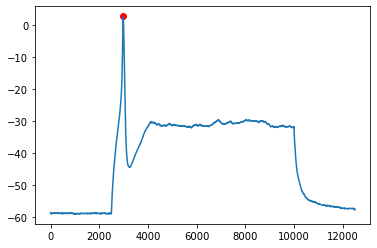

16 dpi/Trains/2022-04-06_001_08.asc
[-31.870365140000004, 9.851977229000001, -72.15400785, 0.92, 2.2399999999999998, 80.0, 0.0, 1.0]


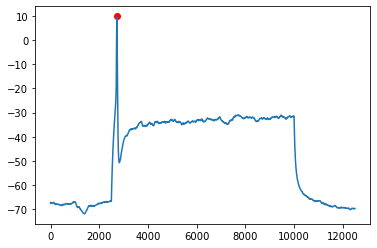

16 dpi/Trains/2022-04-06_001_10.asc
[-32.714821400000005, 28.08595449, -60.64439192, 1.16, 1.8, 40.0, 0.0, 1.0]


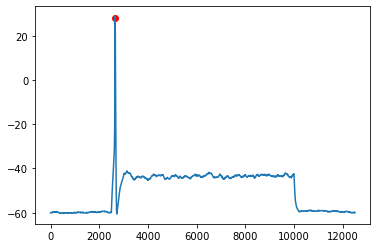

16 dpi/Trains/2022-04-06_001_11.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


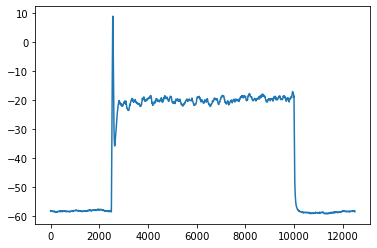

16 dpi/Trains/2022-04-06_001_12.asc
[-30.99463321, 7.443716284, -60.2690801, 1.36, 3.04, 40.0, 0.0, 1.0]


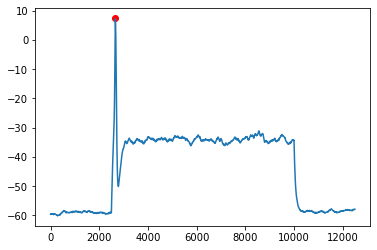

16 dpi/Trains/2022-04-06_001_13.asc
[-37.15603054, 9.445387870000001, -60.2690801, 1.1199999999999999, 2.28, 60.0, 0.0, 1.0]


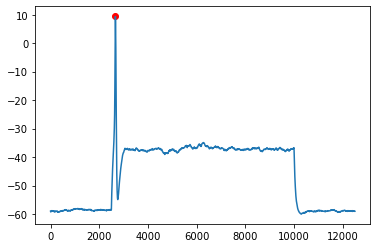

16 dpi/Trains/2022-04-06_001_15.asc
[-35.967536270000004, 10.28984319, -61.520125719999996, 0.88, 1.84, 60.0, 0.0, 1.0]


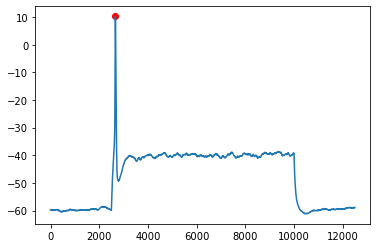

16 dpi/Trains/2022-04-06_001_16.asc
[-33.43417123, 22.018387909999998, -61.520125719999996, 1.96, 3.12, 40.0, 0.0, 1.0]


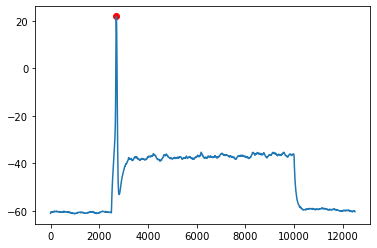

16 dpi/Trains/2022-04-13_001_01.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


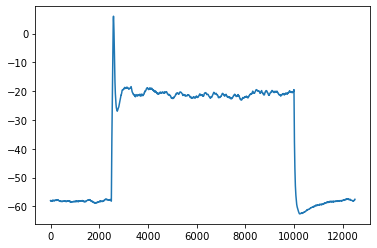

16 dpi/Trains/2022-04-13_001_03.asc
[-32.4020572, 11.66599244, -60.08142233, 1.32, 2.76, 60.0, 0.0, 1.0]


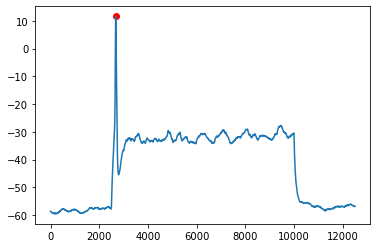

16 dpi/Trains/2022-04-13_001_04.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


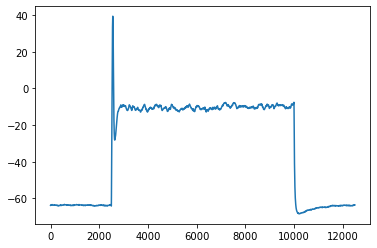

16 dpi/Trains/2022-04-13_001_05.asc
[-30.11890128, 10.196014309999999, -61.707783490000004, 1.08, 2.32, 100.0, 0.0, 1.0]


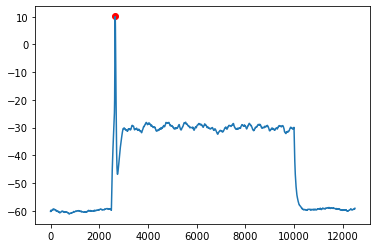

16 dpi/Trains/2022-04-13_001_06.asc
[-33.027581870000006, 12.666828, -58.86165425, 1.8, 4.08, 40.0, 0.0, 1.0]


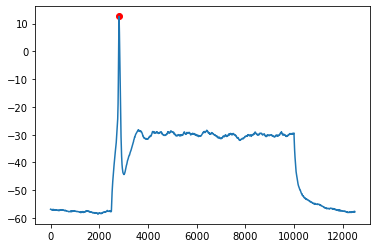

16 dpi/Trains/2022-04-13_001_07.asc
[-38.06303442, 6.567984819, -58.36123601, 1.1199999999999999, 2.72, 40.0, 0.0, 1.0]


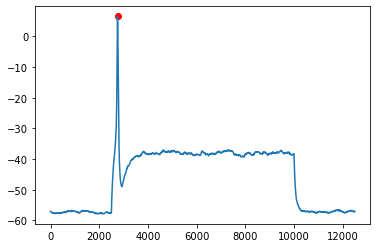

16 dpi/Trains/2022-04-13_001_08.asc
[-28.46126817, 13.88659701, -65.46091288, 2.0, 4.2, 40.0, 0.0, 1.0]


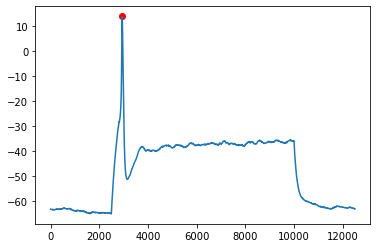

16 dpi/Trains/2022-04-13_001_09.asc
[-29.8999697, 22.70646207, -56.95381016, 1.56, 2.56, 40.0, 0.0, 1.0]


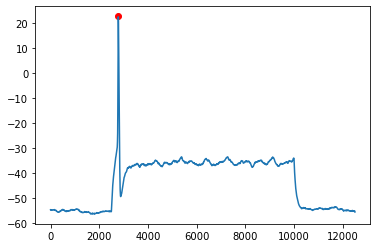

16 dpi/Trains/2022-04-13_001_10.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


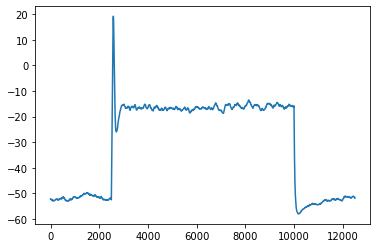

16 dpi/Trains/2022-04-13_001_12.asc
[-33.71565416, 24.05133471, -61.64522842, 2.0799999999999996, 3.3600000000000003, 60.0, 0.0, 1.0]


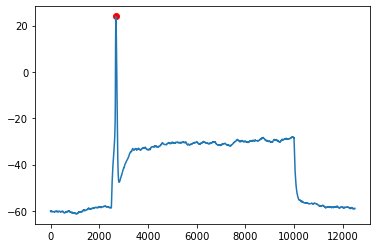

17 dpi/Trains/2022-04-07_001_01.asc
[-33.840760589999995, 6.411604118, -61.6139546, 0.88, 2.04, 80.0, 0.0, 1.0]


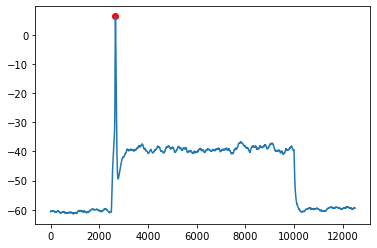

17 dpi/Trains/2022-04-07_001_02.asc
[-42.8795591, 3.06505966, -60.706947, 0.8400000000000001, 2.64, 60.0, 0.0, 1.0]


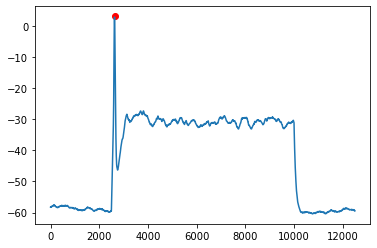

17 dpi/Trains/2022-04-07_001_04.asc
[-35.18563509, 15.07508941, -62.52095848, 1.28, 2.48, 40.0, 0.0, 1.0]


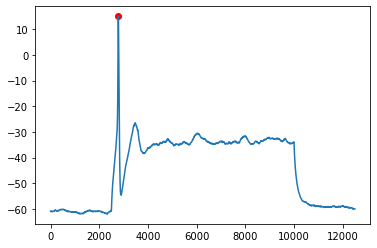

17 dpi/Trains/2022-04-07_001_06.asc
[-28.93040888, 2.220604336, -60.48801169, 1.0399999999999998, 4.64, 80.0, 0.0, 1.0]


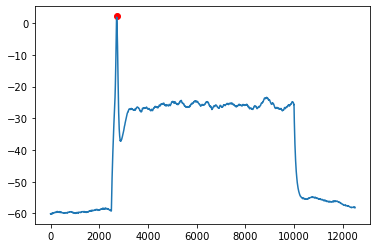

17 dpi/Trains/2022-04-07_001_08.asc
[-34.24734995, 3.409096971, -61.11353636, 0.6, 1.96, 20.0, 0.0, 1.0]


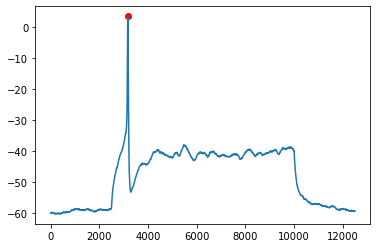

17 dpi/Trains/2022-04-07_001_09.asc
[-36.62433475, 9.445387870000001, -59.04931203, 1.56, 3.6, 40.0, 0.0, 1.0]


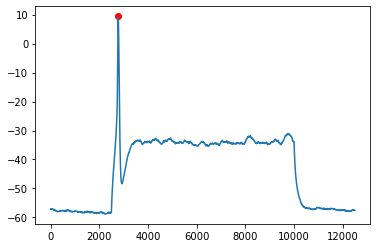

17 dpi/Trains/2022-04-14_001_04.asc
[-34.153521059999996, 9.883253835, -62.27075309, 1.9200000000000002, 3.6, 40.0, 0.0, 1.0]


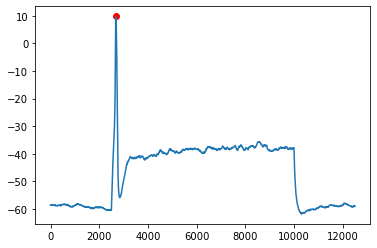

17 dpi/Trains/2022-04-14_001_05.asc
[-27.366602789999998, 7.256059442, -62.11437285, 0.92, 2.76, 160.0, 0.0, 1.0]


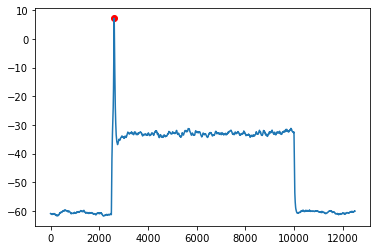

17 dpi/Trains/2022-04-14_001_06.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


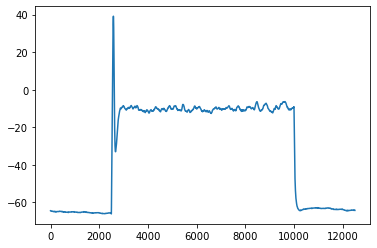

17 dpi/Trains/2022-04-14_001_07.asc
[-36.374125629999995, 23.582194, -61.7390573, 1.1199999999999999, 1.84, 40.0, 0.0, 1.0]


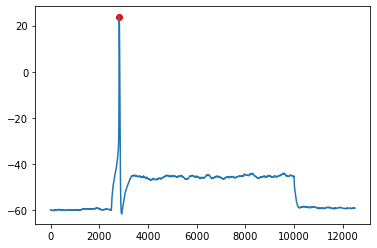

17 dpi/Trains/2022-04-14_001_10.asc
[-21.455416460000002, 12.22896203, -60.92587858, 1.4, 3.3600000000000003, 100.0, 0.0, 1.0]


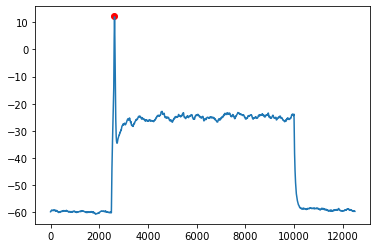

17 dpi/Trains/2022-04-14_001_11.asc
[-29.681036250000002, 3.471649252, -61.01970747, 0.8400000000000001, 3.32, 60.0, 0.0, 1.0]


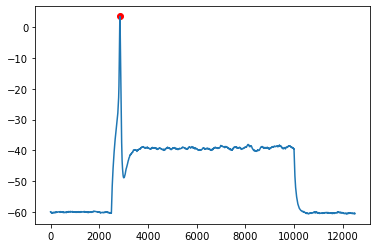

17 dpi/Trains/2022-04-14_001_13.asc
[-33.90331194, 8.382000028999999, -61.95798889, 0.8400000000000001, 2.2399999999999998, 140.0, 0.0, 1.0]


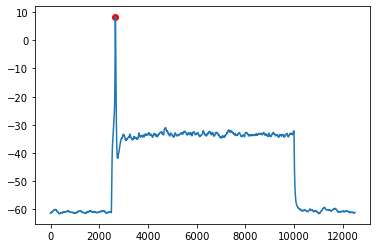

17 dpi/Trains/2022-04-14_001_14.asc
[-35.74860469, 15.07508941, -61.26991659, 1.52, 2.8800000000000003, 40.0, 0.0, 1.0]


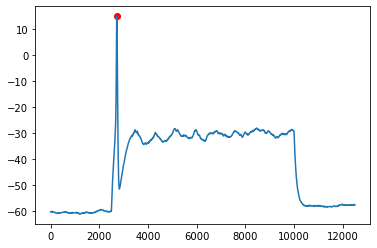

17 dpi/Trains/2022-04-14_001_15.asc
[-31.71398491, 22.26859704, -61.363745480000006, 2.0799999999999996, 3.32, 60.0, 41.35649296939619, 4.0]


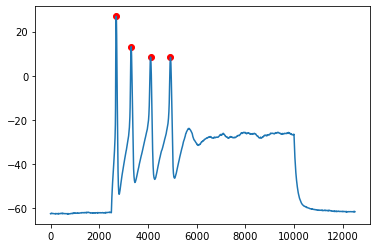

17 dpi/Trains/2022-04-14_001_16.asc
[-33.15268457, 6.16139546, -62.489684669999995, 1.6, 4.159999999999999, 60.0, 0.0, 1.0]


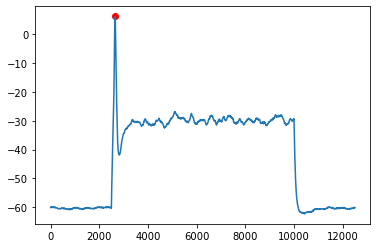

17 dpi/Trains/2022-04-14_001_17.asc
[-36.46795452, 24.11388792, -61.238639060000004, 2.0799999999999996, 3.28, 60.0, 46.21072088724583, 2.0]


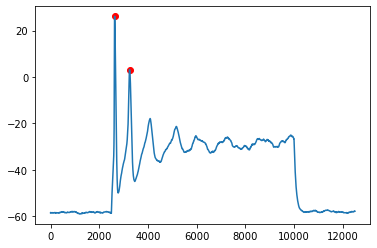

17 dpi/Trains/2022-04-14_001_18.asc
[-31.463775780000002, 24.17643927, -61.48884818, 2.16, 3.64, 60.0, 0.0, 1.0]


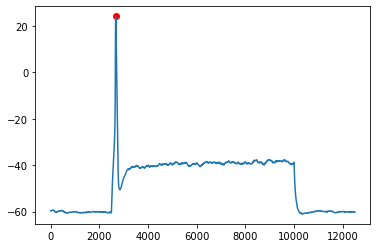

17 dpi/Trains/2022-04-14_001_19.asc
[-33.621829, 21.01755142, -59.831213209999994, 1.8, 2.84, 40.0, 0.0, 1.0]


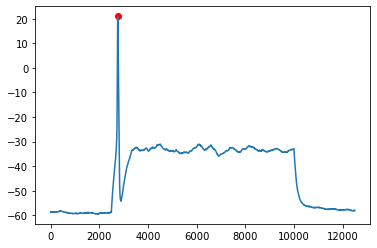

DRG/Trains\2022-03-10_001_2.asc
[-29.49338034, 35.2169089, -63.396692279999996, 3.2399999999999998, 4.88, 40.0, 22.844958879074017, 7.0]


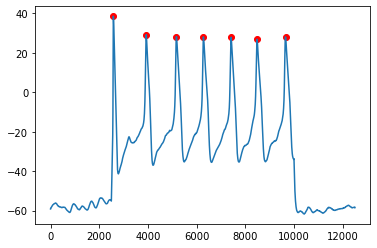

DRG/Trains\2022-03-10_001_3.asc
[-30.58804385, 34.12224352, -72.68569618, 5.6, 8.28, 40.0, 13.92369813422445, 5.0]


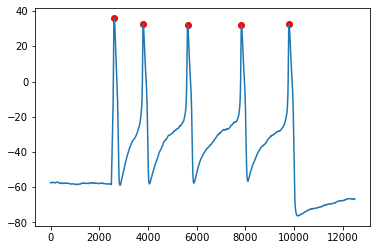

DRG/Trains\2022-03-15_001_1_-70.asc
[-29.681036250000002, 18.796946849999998, -72.06017523999999, 2.2, 4.32, 100.0, 20.295502516642312, 6.0]


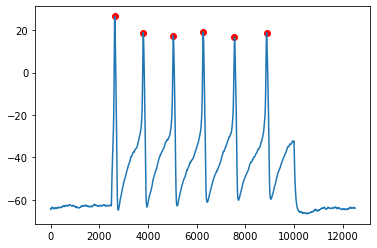

DRG/Trains\2022-03-17_001_2.asc
[-41.00299254, 34.3099013, -74.68736917, 3.96, 5.88, 20.0, 25.731510072048227, 8.0]


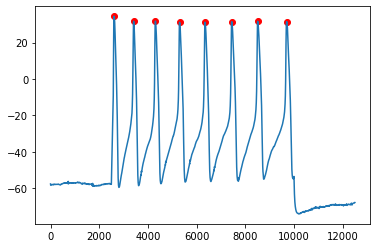

DRG/Trains\2022-03-17_001_3.asc
[-38.84493932, 30.02507426, -70.4338178, 3.8, 6.08, 40.0, 25.15452062670691, 8.0]


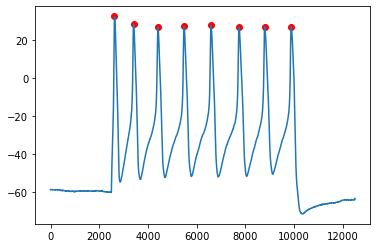

DRG/Trains\2022-03-23_001_1.asc
[-32.80864656, 30.619319530000002, -68.46342236, 4.92, 7.04, 80.0, 11.04728236853734, 4.0]


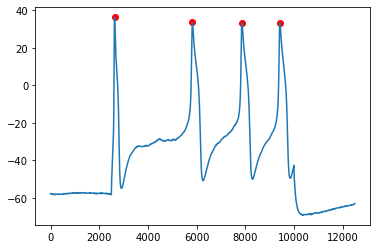

DRG/Trains\2022-03-23_001_6.asc
[-41.78489372, 25.490036229999998, -65.86750597000001, 5.2, 11.0, 100.0, 13.863216266173753, 5.0]


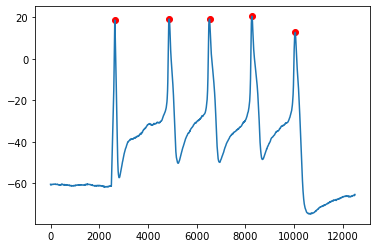

DRG/Trains\2022-03-23_001_7.asc
[-42.8795591, 23.300707340000002, -66.93089008, 4.6, 10.16, 80.0, 16.337199803953602, 5.0]


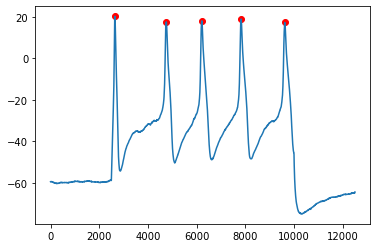

DRG/Trains\2022-04-13_001_1.asc
[-23.926230150000002, 37.34368458, -69.12022084, 9.2, 12.16, 100.0, 0.0, 1.0]


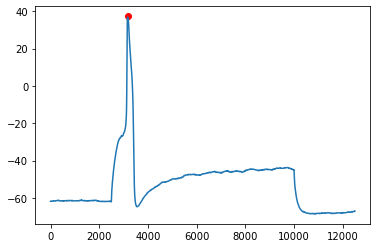

DRG/Trains\2022-04-13_001_2.asc
[nan, nan, nan, nan, nan, nan, 0.0, 0.0]


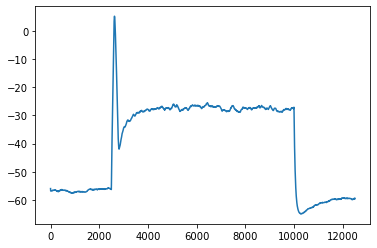

DRG/Trains\2022-04-21_001_1.asc
[-32.58971497, 14.074252920000001, -64.46007639, 2.4, 4.96, 40.0, 28.43062926459439, 4.0]


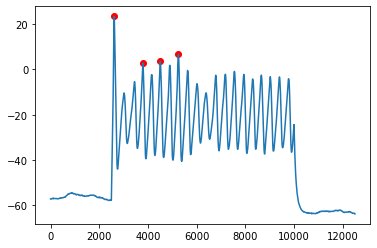

DRG/Trains\2022_03_09_001_3.asc
[-36.374125629999995, 33.65310282, -74.21822845999999, 4.984999999999999, 6.885, 180.0, 0.0, 1.0]


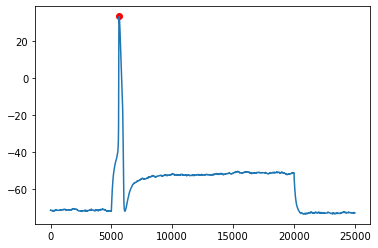

DRG/Trains\2022_03_09_001_4.asc
[-29.49338034, 23.20688032, -76.00096613, 3.4450000000000003, 6.365, 80.0, 0.0, 1.0]


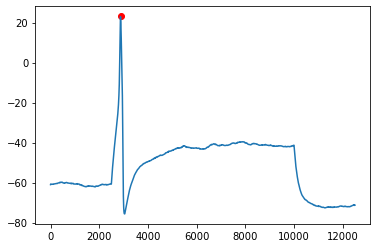

In [ ]:
all_ap_properties = {'14dpi': get_ap_properties_all(dpi14_path),
                    '15dpi': get_ap_properties_all(dpi15_path),
                    '16dpi': get_ap_properties_all(dpi16_path),
                    '17dpi': get_ap_properties_all(dpi17_path),
                    'drg': get_ap_properties_all(drg_path)}

In [ ]:
all_ap_properties

{'14dpi': [{'firing_threshold': -38.90749067,
   'amplitude_max': 16.85782708,
   'amplitude_min': -61.42629683,
   'spike_width_0mV': 1.48,
   'spike_width': 2.56,
   'rheobase': 40.0,
   'max_frequency': 0.0,
   'max_ap_number': 1.0},
  {'firing_threshold': -35.248186440000005,
   'amplitude_max': 4.128447734,
   'amplitude_min': -59.54973027,
   'spike_width_0mV': 1.36,
   'spike_width': 3.8,
   'rheobase': 40.0,
   'max_frequency': 0.0,
   'max_ap_number': 1.0},
  {'firing_threshold': -36.53050587,
   'amplitude_max': 15.66933468,
   'amplitude_min': -61.238639060000004,
   'spike_width_0mV': 1.72,
   'spike_width': 3.0,
   'rheobase': 40.0,
   'max_frequency': 0.0,
   'max_ap_number': 1.0},
  {'firing_threshold': -38.4696275,
   'amplitude_max': 15.70061222,
   'amplitude_min': -60.8320497,
   'spike_width_0mV': 2.12,
   'spike_width': 3.64,
   'rheobase': 40.0,
   'max_frequency': 0.0,
   'max_ap_number': 1.0},
  {'firing_threshold': nan,
   'amplitude_max': nan,
   'amplitude_mi

## Save Train data to json

In [ ]:
with open("AP_trains.json", "w") as outfile:
    json.dump(all_ap_properties, outfile, indent=4)

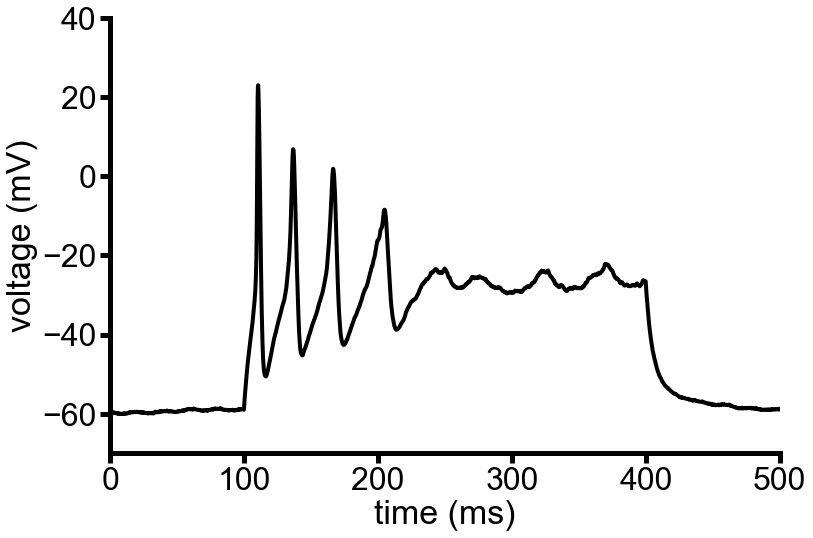

In [445]:
plt.figure(figsize=(12,8))
plt.plot(trains.time[2]*1000, trains.voltage_filtered[2], c='k',linewidth=4)


ax = plt.gca()
ax.set_xlim([0, 500])
ax.set_ylim([-70, 40])
ax.tick_params(length=6, width=4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('time (ms)', fontsize=34, fontname='Arial')
plt.ylabel('voltage (mV)', fontsize=34,fontname='Arial')


plt.savefig('APs_40pA.png', bbox_inches = "tight")   
plt.show() 